In [17]:
import sys
import os
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt

In [20]:
import albumentations as A

In [3]:
sys.path.append('../modules/')
import dataset as D

In [67]:
reload(D)

<module 'dataset' from '../modules/dataset.py'>

In [48]:
transforms = A.Compose([
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.RandomRotate90(),
    A.ShiftScaleRotate()
])

In [68]:
%%time
wt_dataset = D.FramesDataset(path_data='../../data',
                             dir_frames='frames_separated',
                             select='wt',
                             transforms=transforms,
                             )

Read cached metainfo from ../../data/metainfo_replicate*_wt.csv
CPU times: user 614 ms, sys: 17.7 ms, total: 632 ms
Wall time: 700 ms


In [70]:
%%time
img, cls = wt_dataset[0]

CPU times: user 3.33 ms, sys: 2.24 ms, total: 5.57 ms
Wall time: 36.2 ms


In [55]:
def plot_same_example(dataset, i=0, n=10, s=2):
    fig, axes = plt.subplots(ncols=n, nrows=1, figsize=(n*s, s))
    for j, ax in enumerate(axes.flat):
        ax.imshow(dataset[i][0].squeeze())
    plt.setp(axes, xticks=[], yticks=[])
    plt.show()

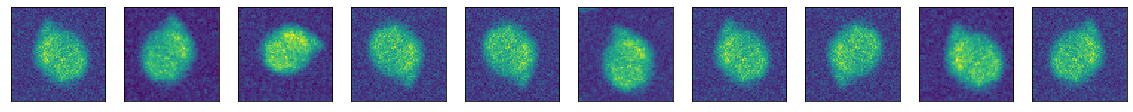

In [71]:
wt_dataset.train()
plot_same_example(wt_dataset)

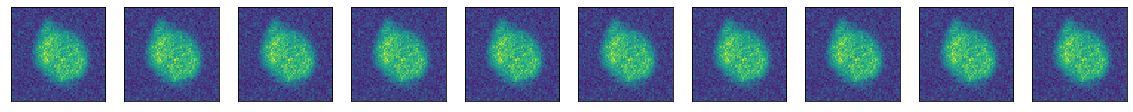

In [72]:
wt_dataset.eval()
plot_same_example(wt_dataset)